In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
features_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                                header=None, names=['column_index', 'column_name'])

In [6]:
features_name = features_name_df.iloc[:,1].values.tolist()

In [7]:
features_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [ ]:
#X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', 
                     names ='features_name')

In [9]:
dup = features_name_df.groupby('column_name').count()

In [14]:
dup[dup['column_index']>1].head(3)

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3


In [37]:
def get_new_feature_name_df(old):
    dup = pd.DataFrame(data=old.groupby('column_name').cumcount(), columns=['dup_cnt'])
    dup = dup.reset_index()
    # print(dup.head())
    # print(old.reset_index().head())
    new = pd.merge(old.reset_index(), dup, how='outer')
    new['column_name'] = new[['column_name', 'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new.drop(columns=['index'], inplace=True)
    return new

In [36]:
result = get_new_feature_name_df(features_name_df)
result[result['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [48]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                                header=None, names=['column_index', 'column_name'])
    new_name = get_new_feature_name_df(feature_name_df)
    feature_name = new_name.iloc[:,1].values.tolist()
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names =feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names =feature_name)
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', names =['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+', names =['action'])
    return X_train, X_test, y_train, y_test

In [49]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [50]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [54]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [59]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8547675602307431

In [60]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [66]:
from sklearn.model_selection import GridSearchCV

In [69]:
%%time
params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24],
          'min_samples_split': [16]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}
CPU times: total: 57.8 s
Wall time: 57.9 s


In [75]:
pd.DataFrame(grid_cv.cv_results_)[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [76]:
%%time
params = {'max_depth' : [8, 12, 16, 20],
          'min_samples_split': [16, 24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}
CPU times: total: 1min 8s
Wall time: 1min 8s


In [77]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.8717339667458432

In [78]:
im = grid_cv.best_estimator_.feature_importances_

In [84]:
top10 = pd.Series(im,index=X_train.columns).sort_values(ascending=False)[:10]

<AxesSubplot:>

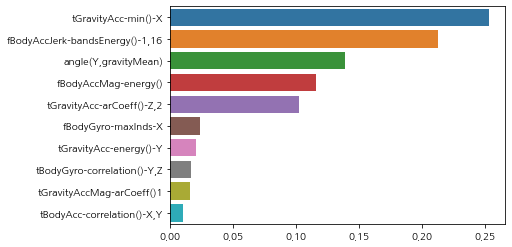

In [85]:
import seaborn as sns
sns.barplot(x=top10, y=top10.index)